# Neural Network Model


<h4><u>Sections:</u></h4>

<ol>
    <li>Imports & Settings</li>
    <li>Data Loads & Transforms</li>
    <li>Model Build & Training</li>
    <li>Model Recall & Evaluation</li>
    <ol>
            <li>General View of Model Behavior</li>
            <li>Comparison to Baseline</li>
    </ol>
<ol>
    
    
    
    
---

---
### 1. Imports & Settings:

In [1]:
# standard library imports:

import os


# package imports:

import pandas as pd
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# general settings:

sns.set()

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 300

---
### 2. Data Loads & Transformations:
---

In [31]:
# load the csv data prepared & exported by 'data_load_transform_EDA.ipynb'

df = pd.read_csv('predict_WTI.csv', index_col=0)

df

,price,t90d_mean,t30d_mean,f30d_mean,US Production,storage,gdp,f30d_mean_gdp,f365d_mean_gdp
1990-01-01,21.84,20.387000,21.151000,22.904667,7565,904134,9340.478778,9352.766670,9368.661736
1990-01-02,22.88,20.417111,21.238333,22.933000,7565,904134,9341.326219,9353.614111,9368.475865
1990-01-03,23.81,20.460000,21.357333,22.927333,7565,904134,9342.173660,9354.461552,9368.287526
1990-01-04,23.41,20.499111,21.463667,22.901667,7565,904134,9343.021100,9355.303125,9368.096719
1990-01-05,23.07,20.534444,21.550667,22.889333,7512,904076,9343.868541,9356.138830,9367.903444
...,...,...,...,...,...,...,...,...,...
2021-10-14,81.43,71.349222,75.840333,82.745000,11400,1043945,19617.739033,19653.189860,20048.135191
2021-10-15,82.39,71.467333,76.167000,82.726333,11300,1041820,19620.178531,19655.643559,20050.372550
2021-10-16,82.39,71.585444,76.490333,82.675667,11300,1041820,19622.618029,19658.098442,20052.607767
2021-10-17,82.39,71.762556,76.833667,82.624333,11300,1041820,19625.057527,19660.554507,20054.840844


In [32]:
# reduce the data for modeling a more recent period, and
# split into input (X) and output (y) datasets:

# X = df[-3000:].reset_index().drop(['f30d_mean', 'index'], axis=1)
# y = df[-3000:].reset_index()['f30d_mean']

X = df.reset_index(drop=True).drop('f30d_mean', axis=1)
y = df['f30d_mean'].reset_index(drop=True)

In [33]:
X

,price,t90d_mean,t30d_mean,US Production,storage,gdp,f30d_mean_gdp,f365d_mean_gdp
0,21.84,20.387000,21.151000,7565,904134,9340.478778,9352.766670,9368.661736
1,22.88,20.417111,21.238333,7565,904134,9341.326219,9353.614111,9368.475865
2,23.81,20.460000,21.357333,7565,904134,9342.173660,9354.461552,9368.287526
3,23.41,20.499111,21.463667,7565,904134,9343.021100,9355.303125,9368.096719
4,23.07,20.534444,21.550667,7512,904076,9343.868541,9356.138830,9367.903444
...,...,...,...,...,...,...,...,...
11608,81.43,71.349222,75.840333,11400,1043945,19617.739033,19653.189860,20048.135191
11609,82.39,71.467333,76.167000,11300,1041820,19620.178531,19655.643559,20050.372550
11610,82.39,71.585444,76.490333,11300,1041820,19622.618029,19658.098442,20052.607767
11611,82.39,71.762556,76.833667,11300,1041820,19625.057527,19660.554507,20054.840844


In [34]:
y

0        22.904667
1        22.933000
2        22.927333
3        22.901667
4        22.889333
           ...    
11608    82.745000
11609    82.726333
11610    82.675667
11611    82.624333
11612    82.570000
Name: f30d_mean, Length: 11613, dtype: float64

In [35]:
# create the train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scal = RobustScaler()

X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [36]:
# examine X and y shapes:

print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))

X shape: (11613, 8)
y shape: (11613,)
X_train shape: (8129, 8)
y_train shape: (8129,)


---
### 3. Model Build & Training: 
---

In [30]:
# build the neural network:

mod = Sequential()

mod.add(Dense(128, activation='relu'))
mod.add(Dense(128, activation='relu'))
mod.add(Dense(128, activation='relu'))
mod.add(Dense(1))

mod.compile(optimizer='adam', loss='mse')


# set up early stopping:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# set up checkpoints to recall the best model:
model_cp = tf.keras.callbacks.ModelCheckpoint('models_best_nn.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# train the NN:

mod.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop, model_cp], verbose=0)

In [11]:
# view the history of model loss & validation loss:

history = pd.DataFrame(mod.history.history).plot()
history

plt.ylim(0, 20)

TypeError: no numeric data to plot

---
### 4. Model Recall & Evaluation:

#### A. General View of Model Behavior
---

(0.0, 145.78884999999997)

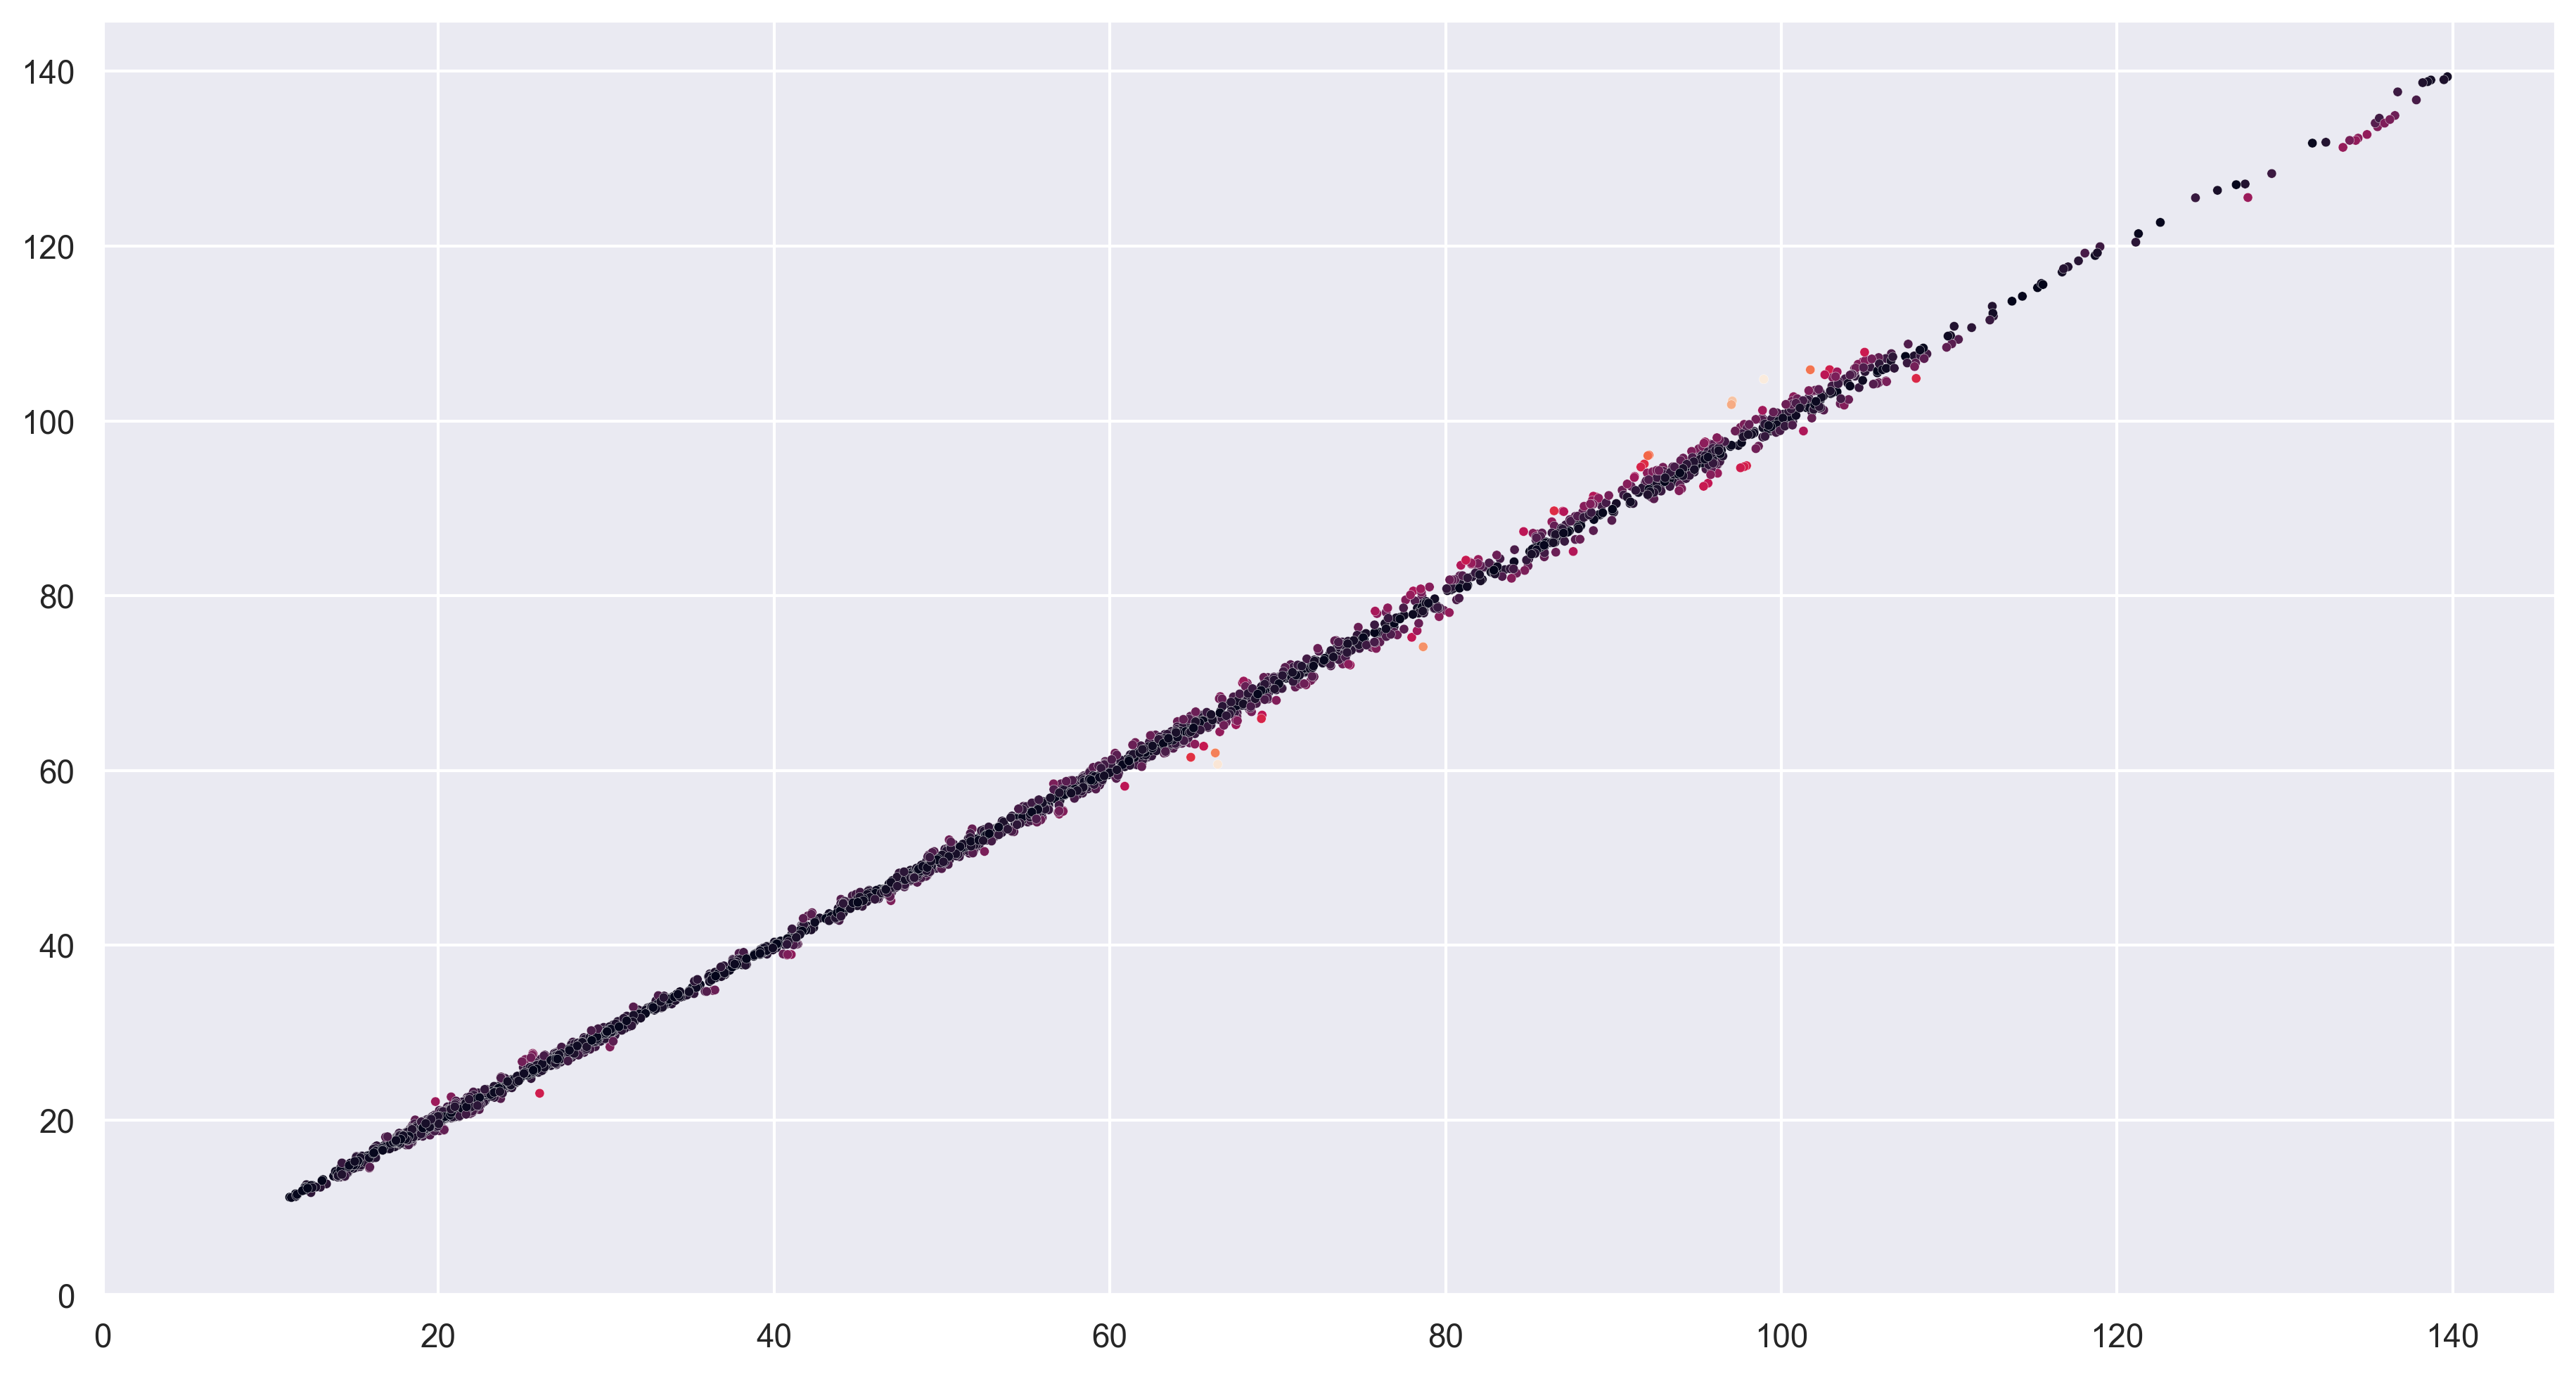

In [67]:
# recall the best model:
mod = tf.keras.models.load_model('models_best_nn.h5')


# create and view predictions versus actual (test data only):

predictions = mod.predict(X_test).reshape(y_test.shape)

plt.scatter(predictions, y_test, s=10, c=abs(y_test-predictions), edgecolors='w', linewidth=.1)
plt.xlim(0,)
plt.ylim(0,)

In [81]:
# create a "model view" (mv) dataframe:

mv = df.copy()
mv['NN_pred'] = mod.predict(scal.transform(df[X.columns].values))
mv

,price,t90d_mean,t30d_mean,f30d_mean,US Production,storage,gdp,f30d_mean_gdp,f365d_mean_gdp,NN_pred
1990-01-01,21.84,20.387000,21.151000,22.904667,7565,904134,9340.478778,9352.766670,9368.661736,22.017687
1990-01-02,22.88,20.417111,21.238333,22.933000,7565,904134,9341.326219,9353.614111,9368.475865,22.795509
1990-01-03,23.81,20.460000,21.357333,22.927333,7565,904134,9342.173660,9354.461552,9368.287526,23.292566
1990-01-04,23.41,20.499111,21.463667,22.901667,7565,904134,9343.021100,9355.303125,9368.096719,23.127172
1990-01-05,23.07,20.534444,21.550667,22.889333,7512,904076,9343.868541,9356.138830,9367.903444,22.723604
...,...,...,...,...,...,...,...,...,...,...
2021-10-14,81.43,71.349222,75.840333,82.745000,11400,1043945,19617.739033,19653.189860,20048.135191,83.057686
2021-10-15,82.39,71.467333,76.167000,82.726333,11300,1041820,19620.178531,19655.643559,20050.372550,84.281700
2021-10-16,82.39,71.585444,76.490333,82.675667,11300,1041820,19622.618029,19658.098442,20052.607767,84.234459
2021-10-17,82.39,71.762556,76.833667,82.624333,11300,1041820,19625.057527,19660.554507,20054.840844,84.162079


<AxesSubplot:>

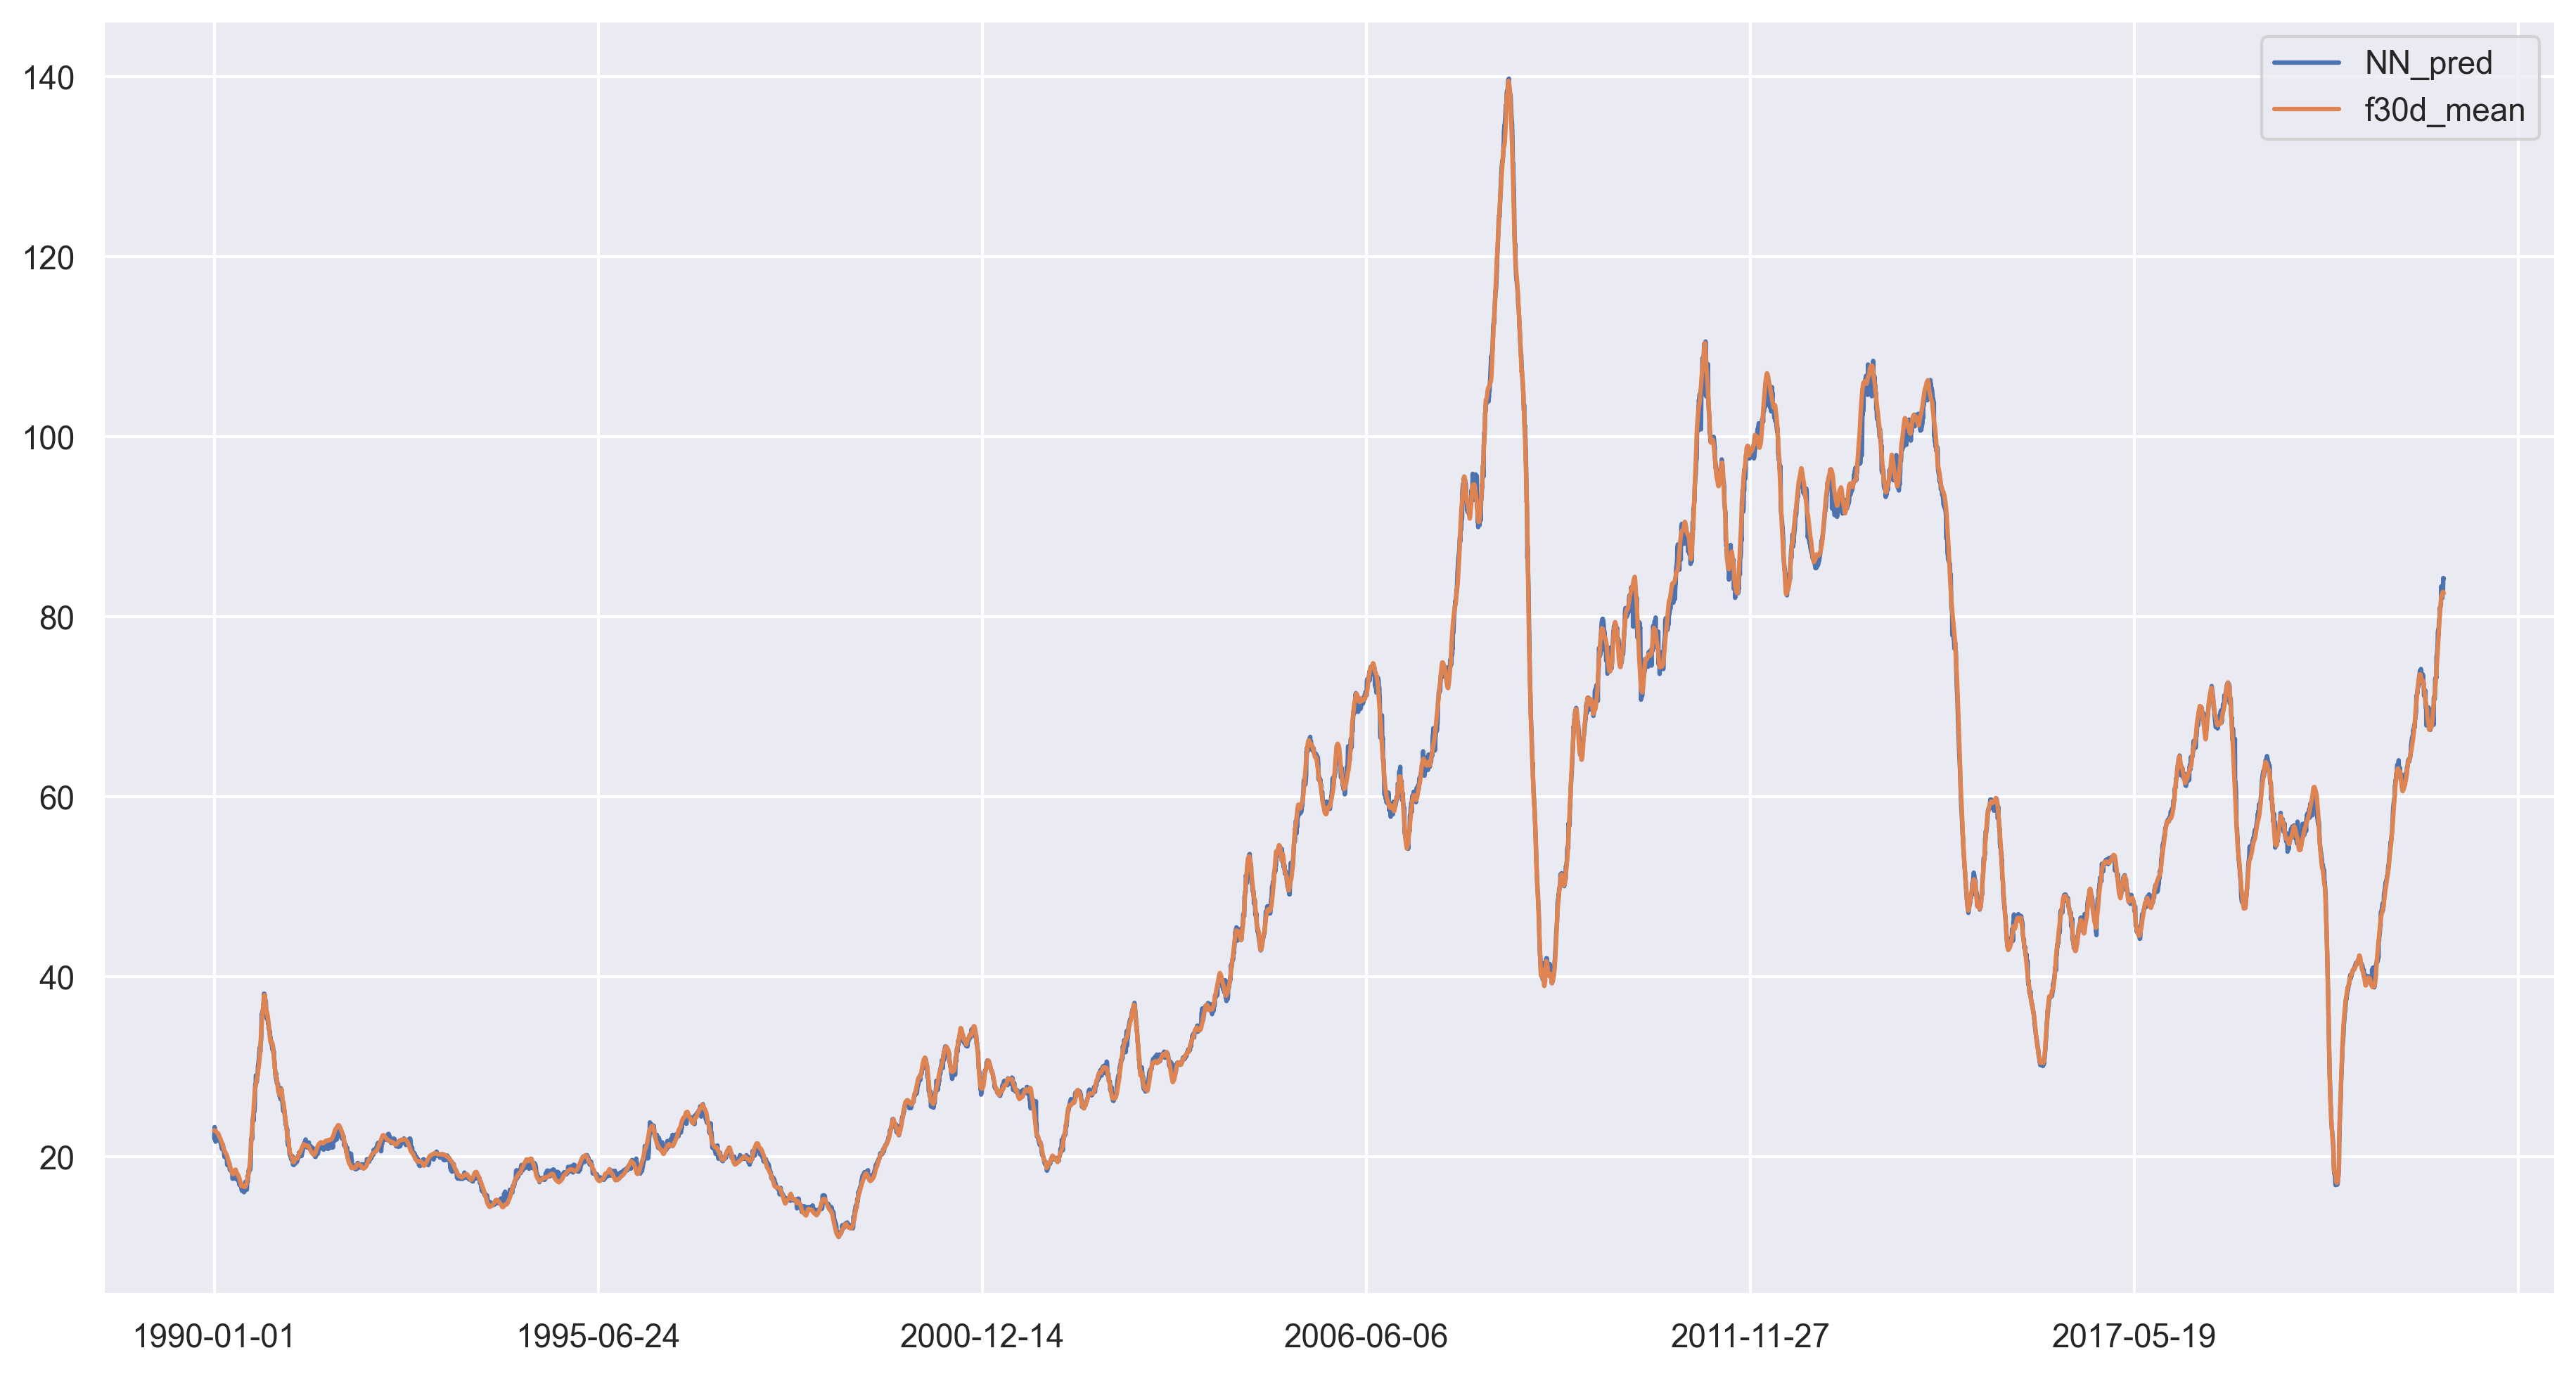

In [82]:
# general visualization of overall model fit
# includes train + test data:

mc[['NN_pred', 'f30d_mean']].plot(figsize=(15,8))

<AxesSubplot:>

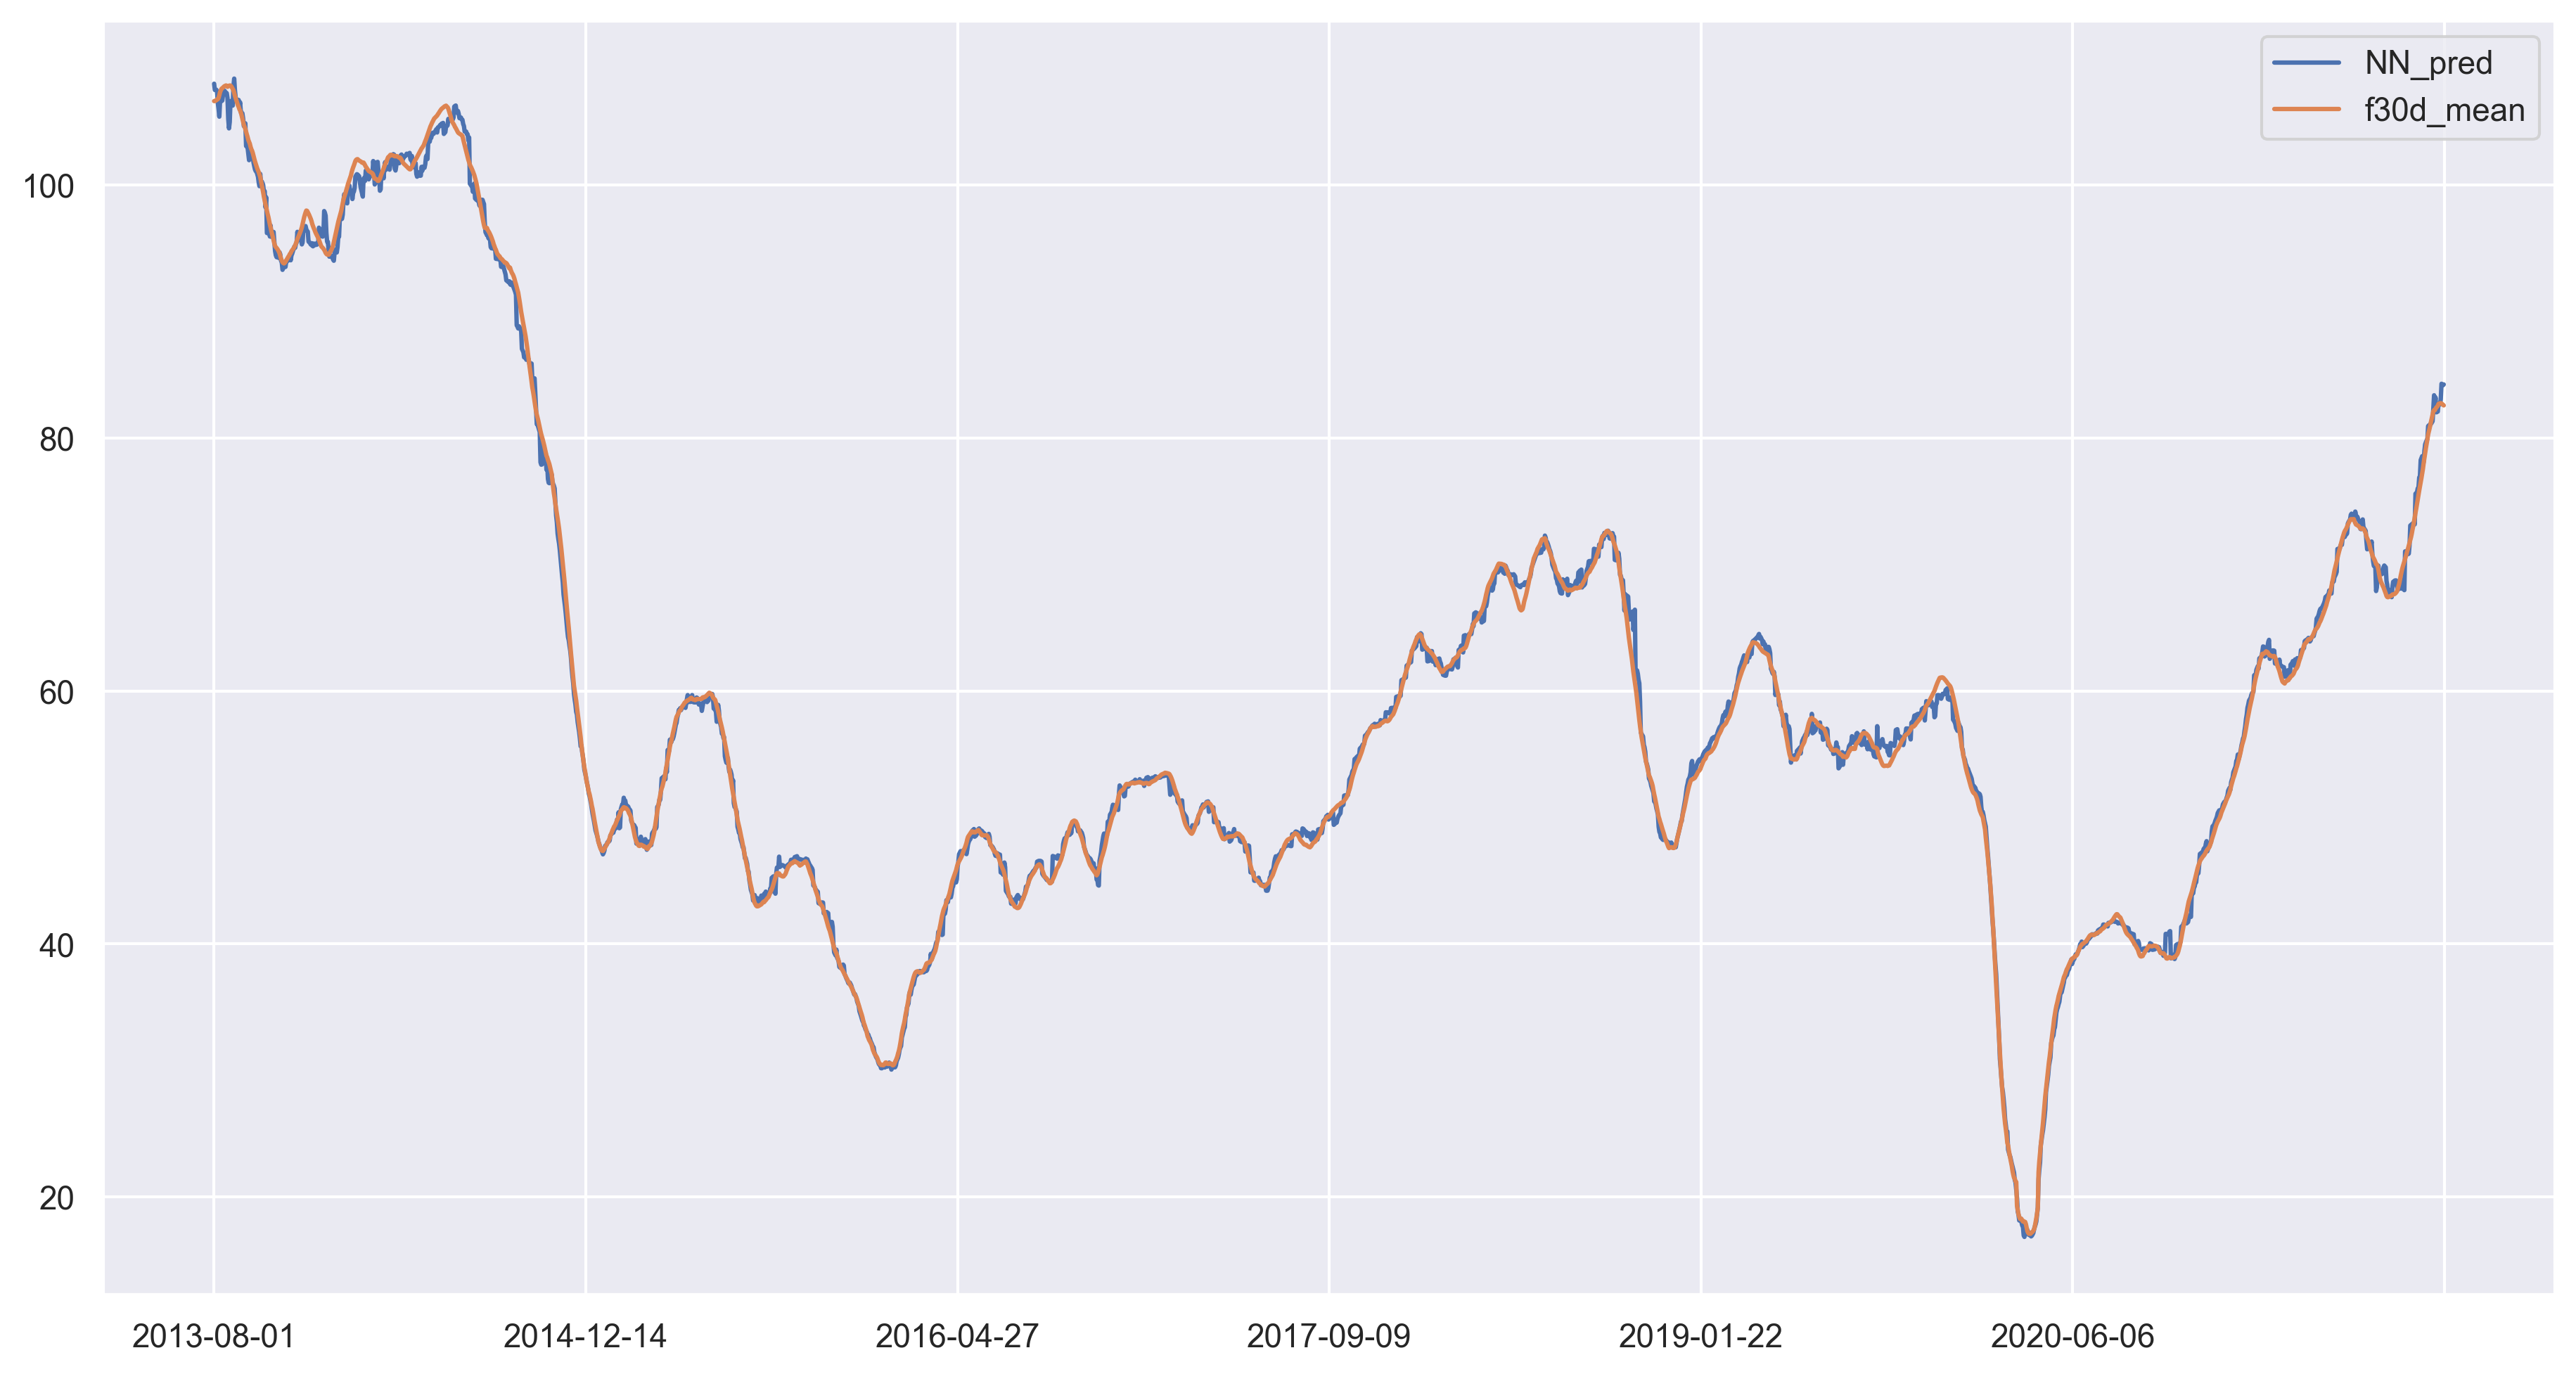

In [83]:
# overall model fit, most recent data:

ts[-3000:][['NN_pred', 'f30d_mean']].plot(figsize=(15,8))

(0.0, 88.0502851409912)

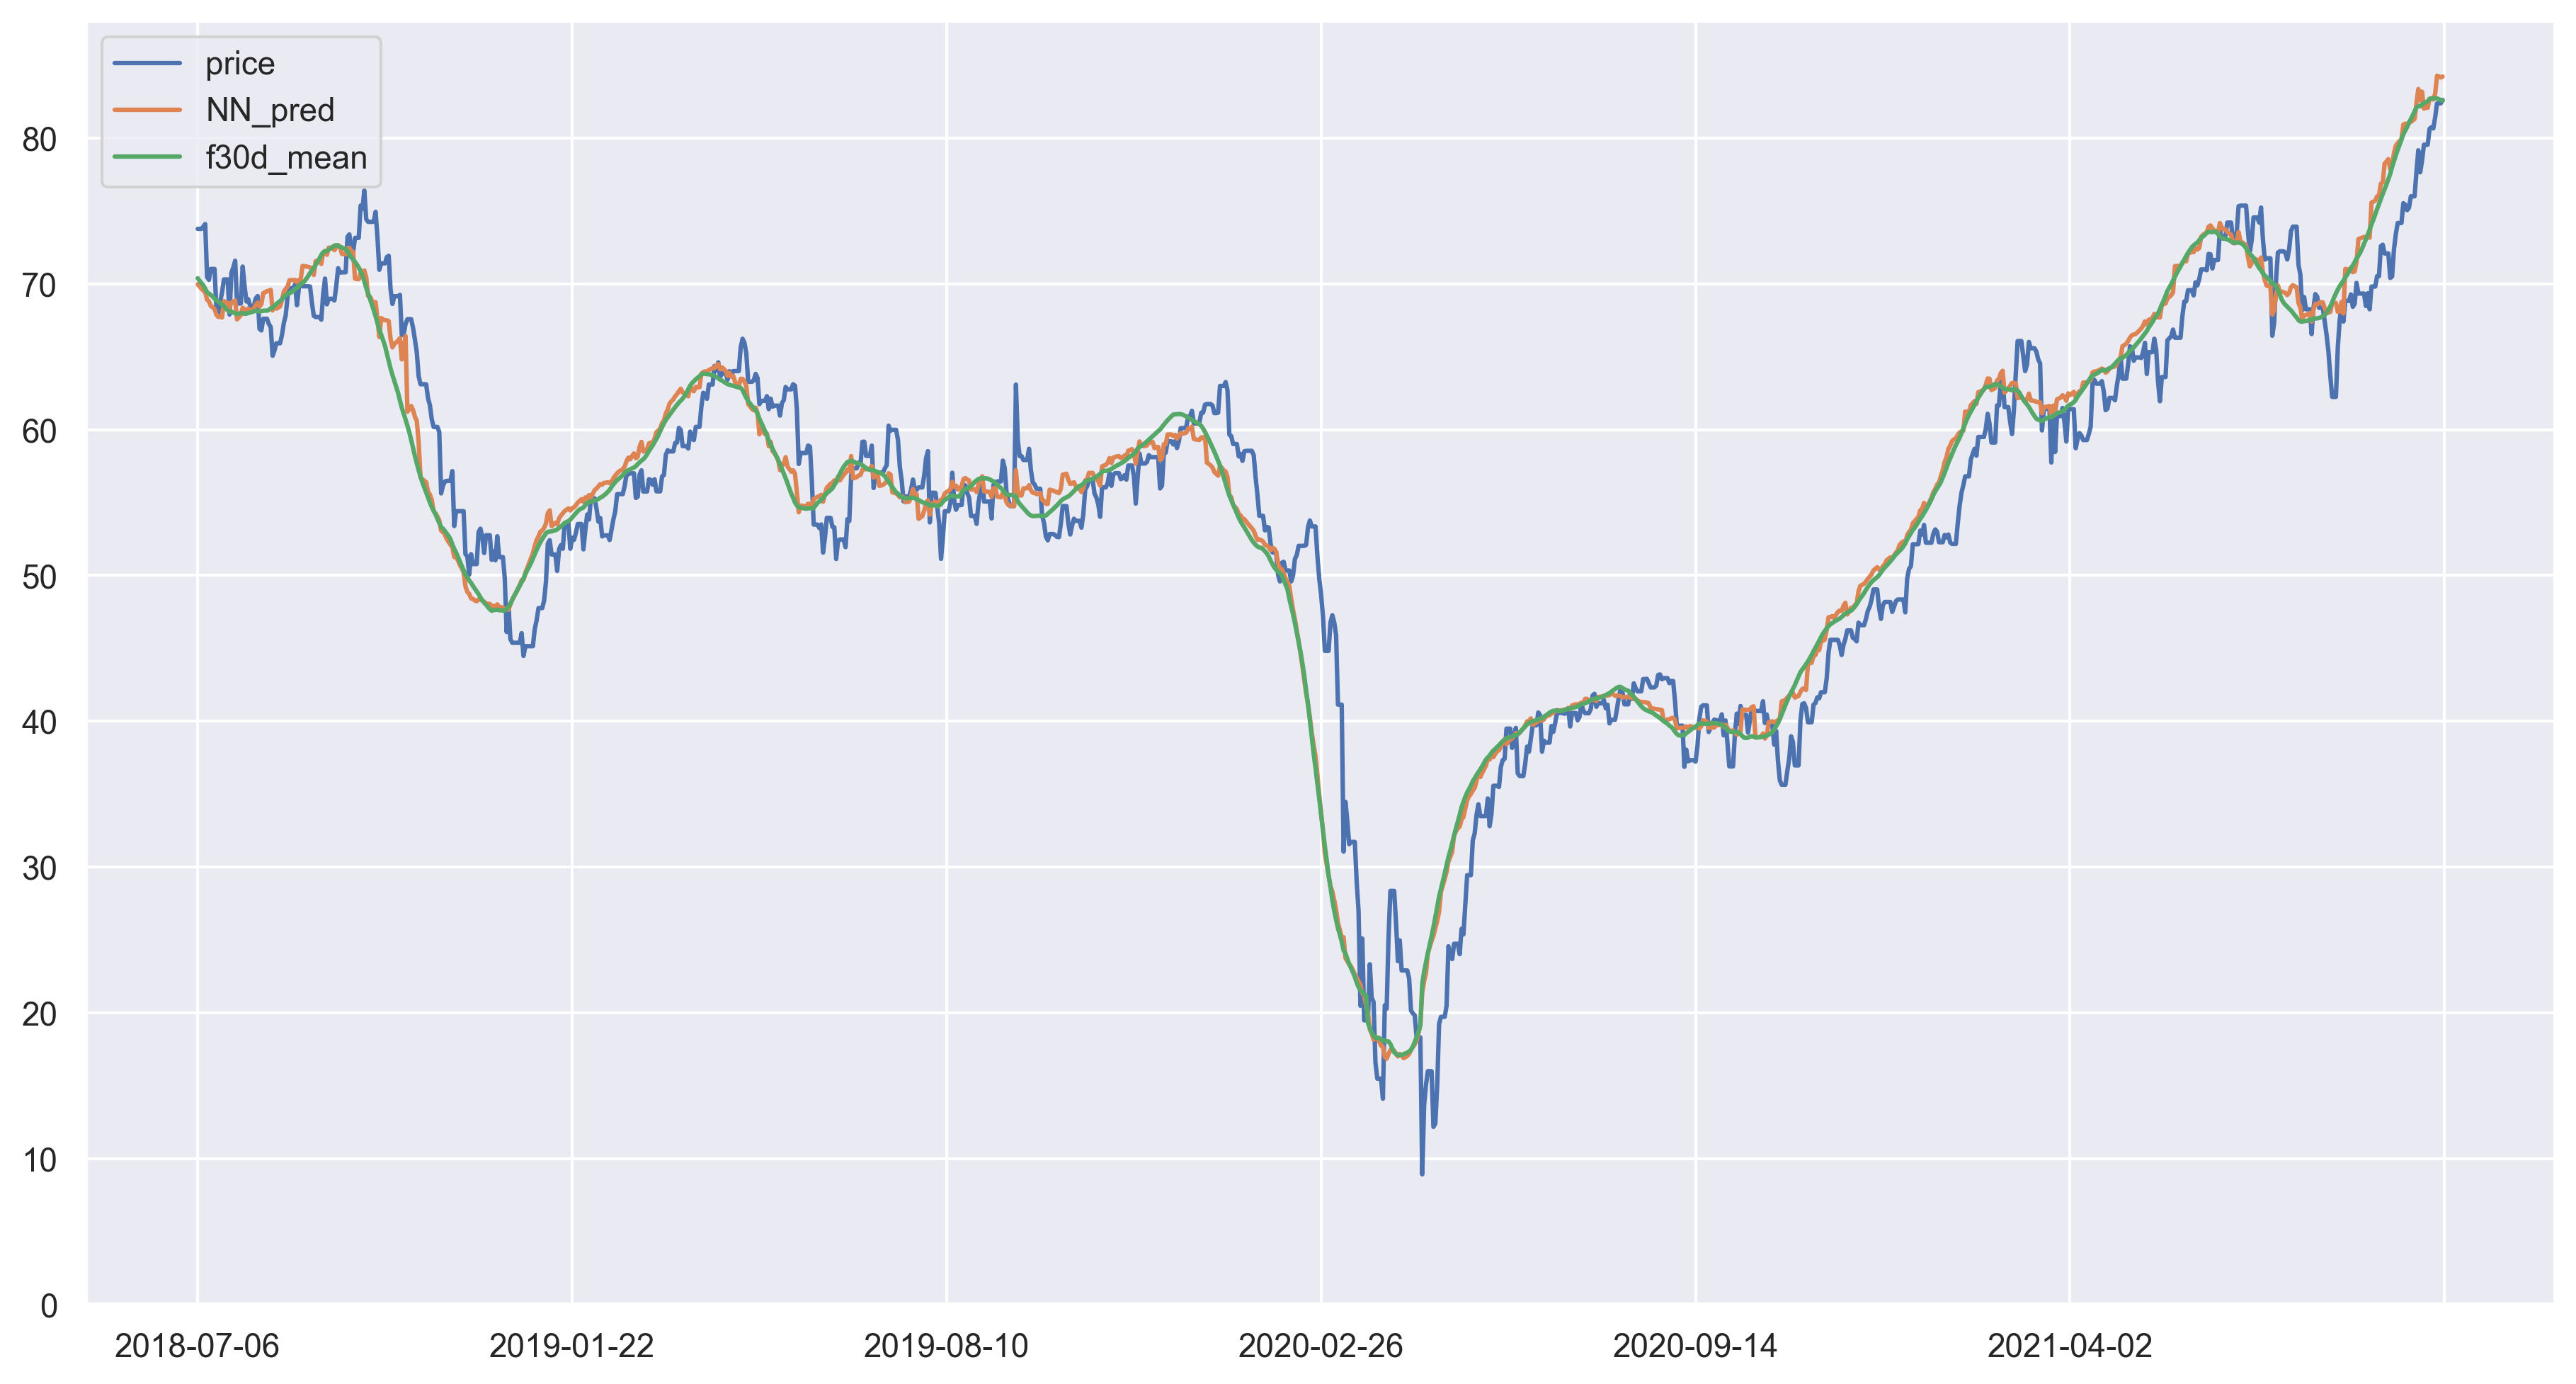

In [84]:
# overall model fit with overlaid visualization of current spot rate:

ts[-1200:][['price', 'NN_pred', 'f30d_mean']].plot()

plt.ylim(0,)

---------------------------------------------------

#### B) Comparison to Baseline

#### It's common to base economic analysis on the presumption, for lack of better information, that ongoing oil prices remain flat. The model at issue should at least improve upon this as a baseline. 

#### I'm considering two alternative baselines which may add to or replace the current (daily spot rate) baseline:
<ul>
    <li>30-days average spot price (similar to daily but more stable)
    <li>Trailing 12-months average spot price (basis for SEC booked reserves economics)
</ul>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='f30d_mean'>

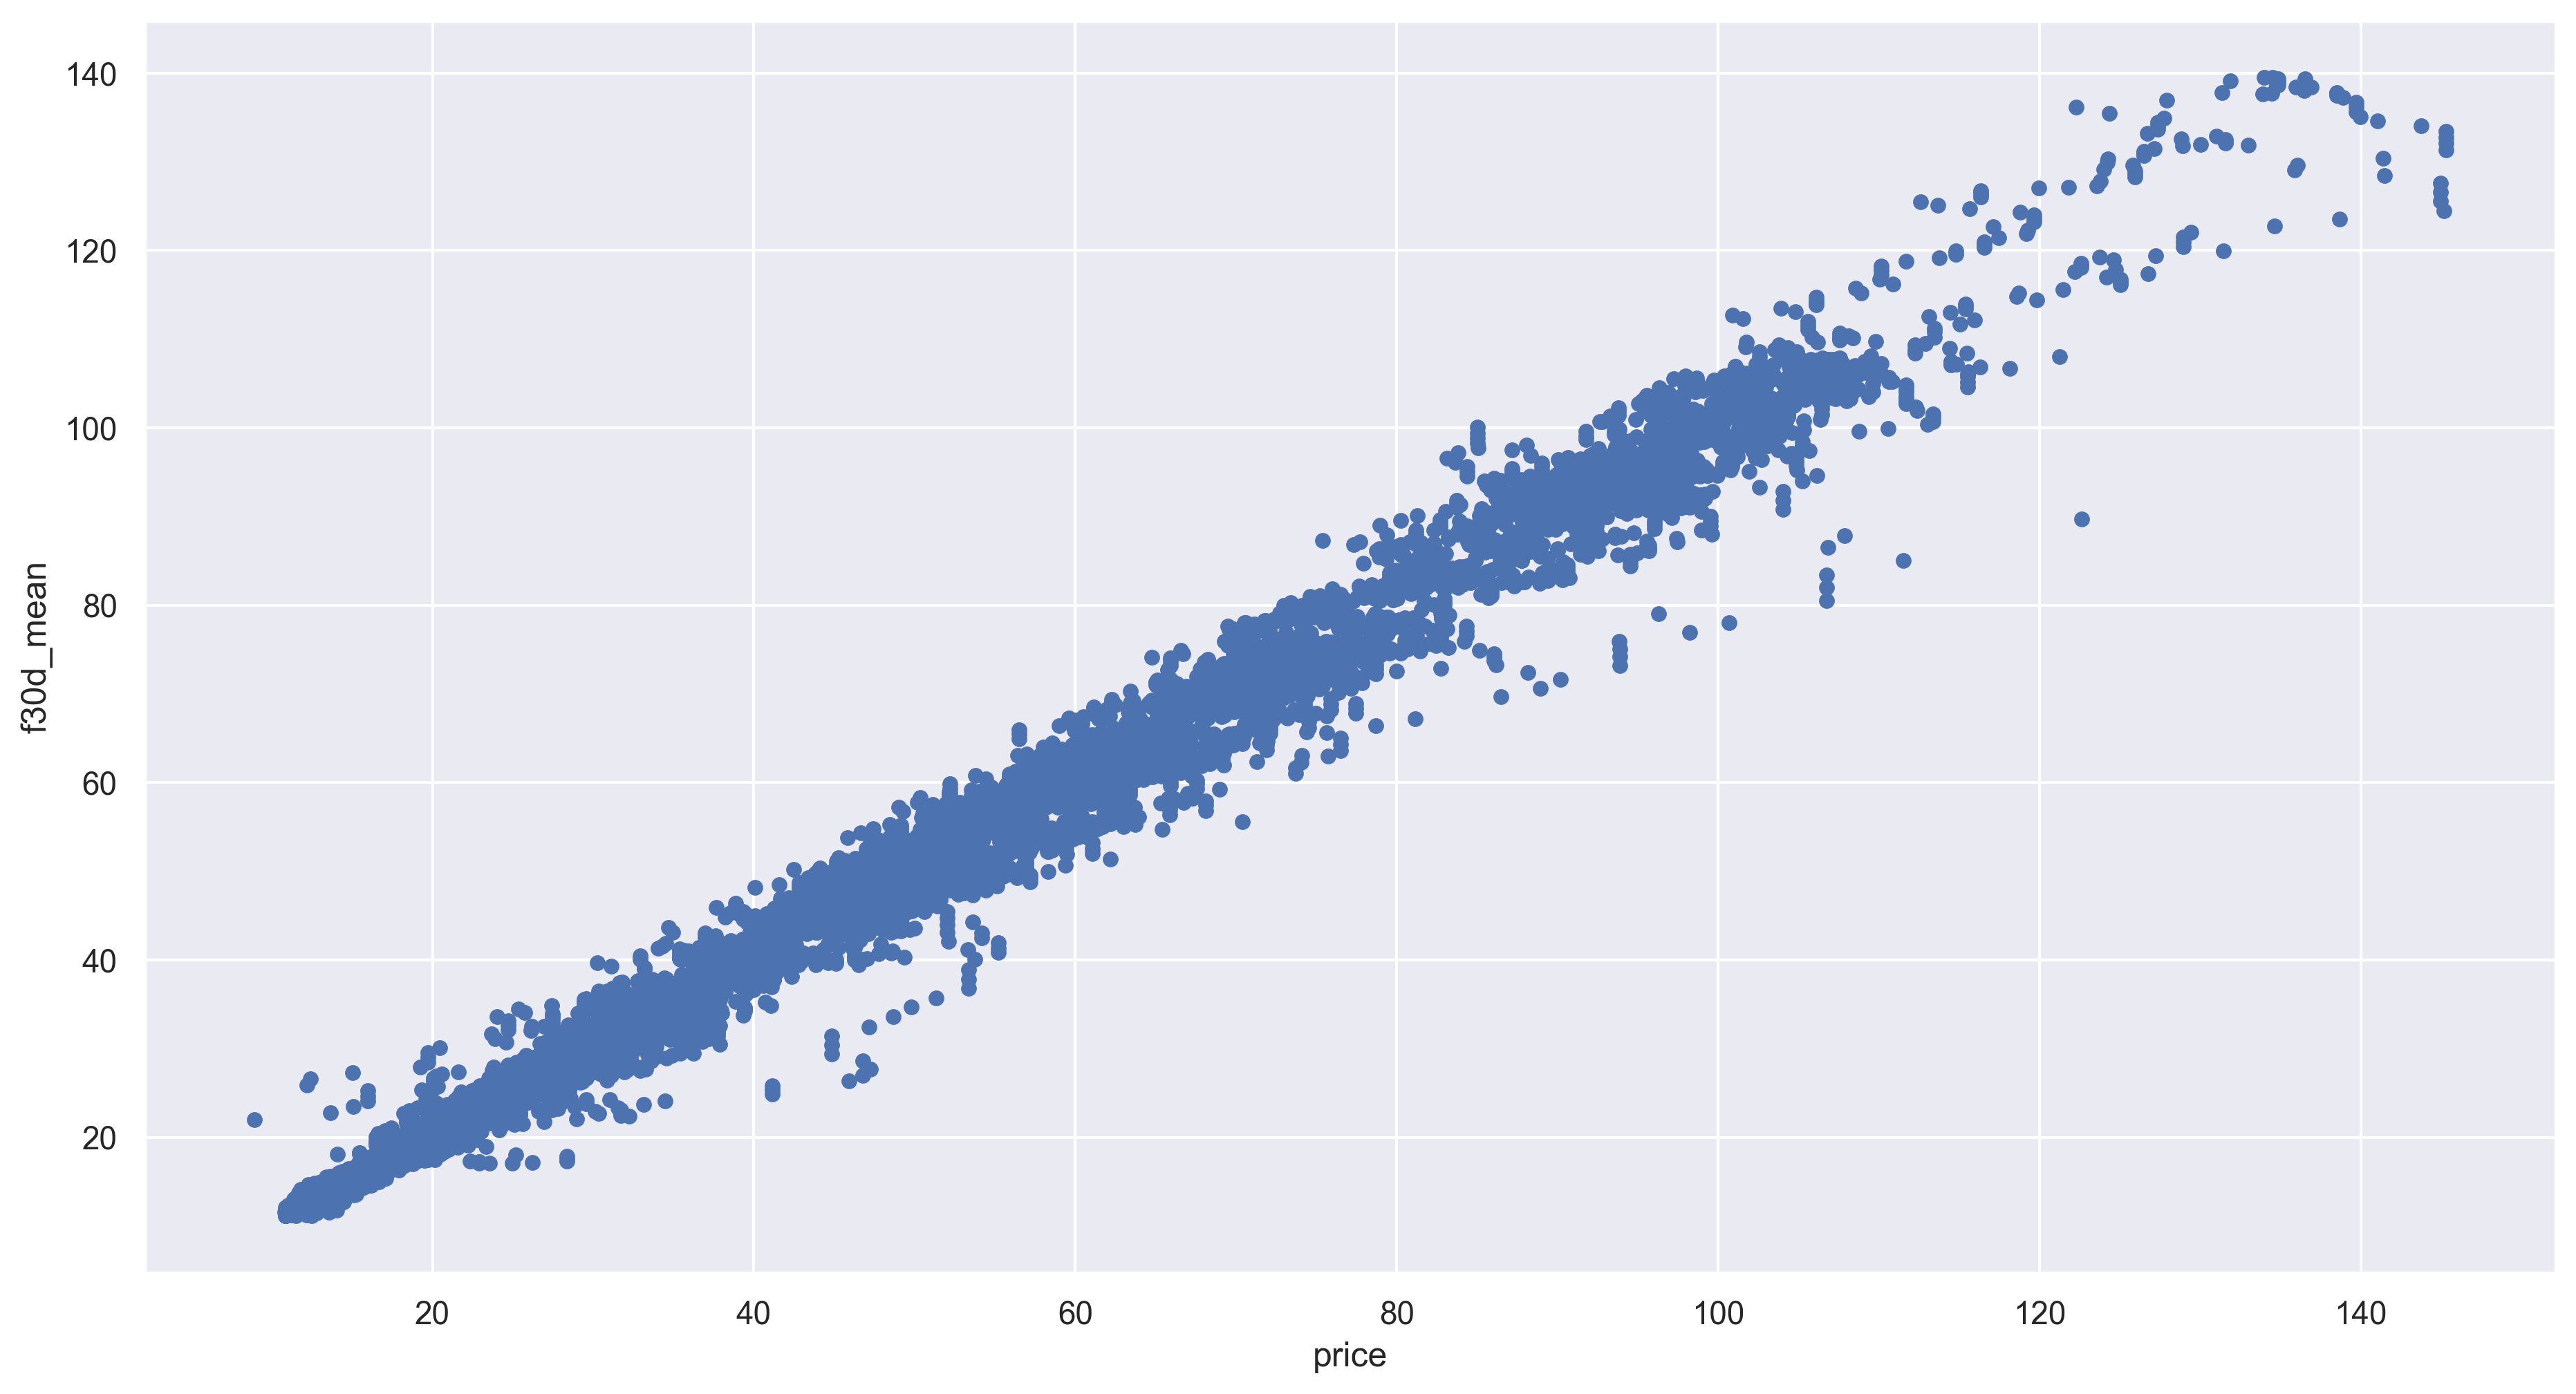

In [85]:
# a visualization of current spot rate (x-axis) versus forward-30-day mean (y-axis):

mv.plot.scatter(x='price', y='f30d_mean')

In [86]:
# quick view of model results
# mse & mae based on test data & predictions:

model_mse, model_mae = mse(y_test, predictions), mae(y_test, predictions)
model_mse, model_mae

(0.5696606243379909, 0.5201947444064654)

In [87]:
# comparison view of "assumed flat oil price"
# mse & mae based on test data vs. same-date spot price

X_test_price = pd.DataFrame(scal.inverse_transform(X_test))[0]

base_mse, base_mae = mse(y_test, X_test_price), mae(y_test, X_test_price)
base_mse, base_mae

(9.283846522483735, 2.0102813815537695)

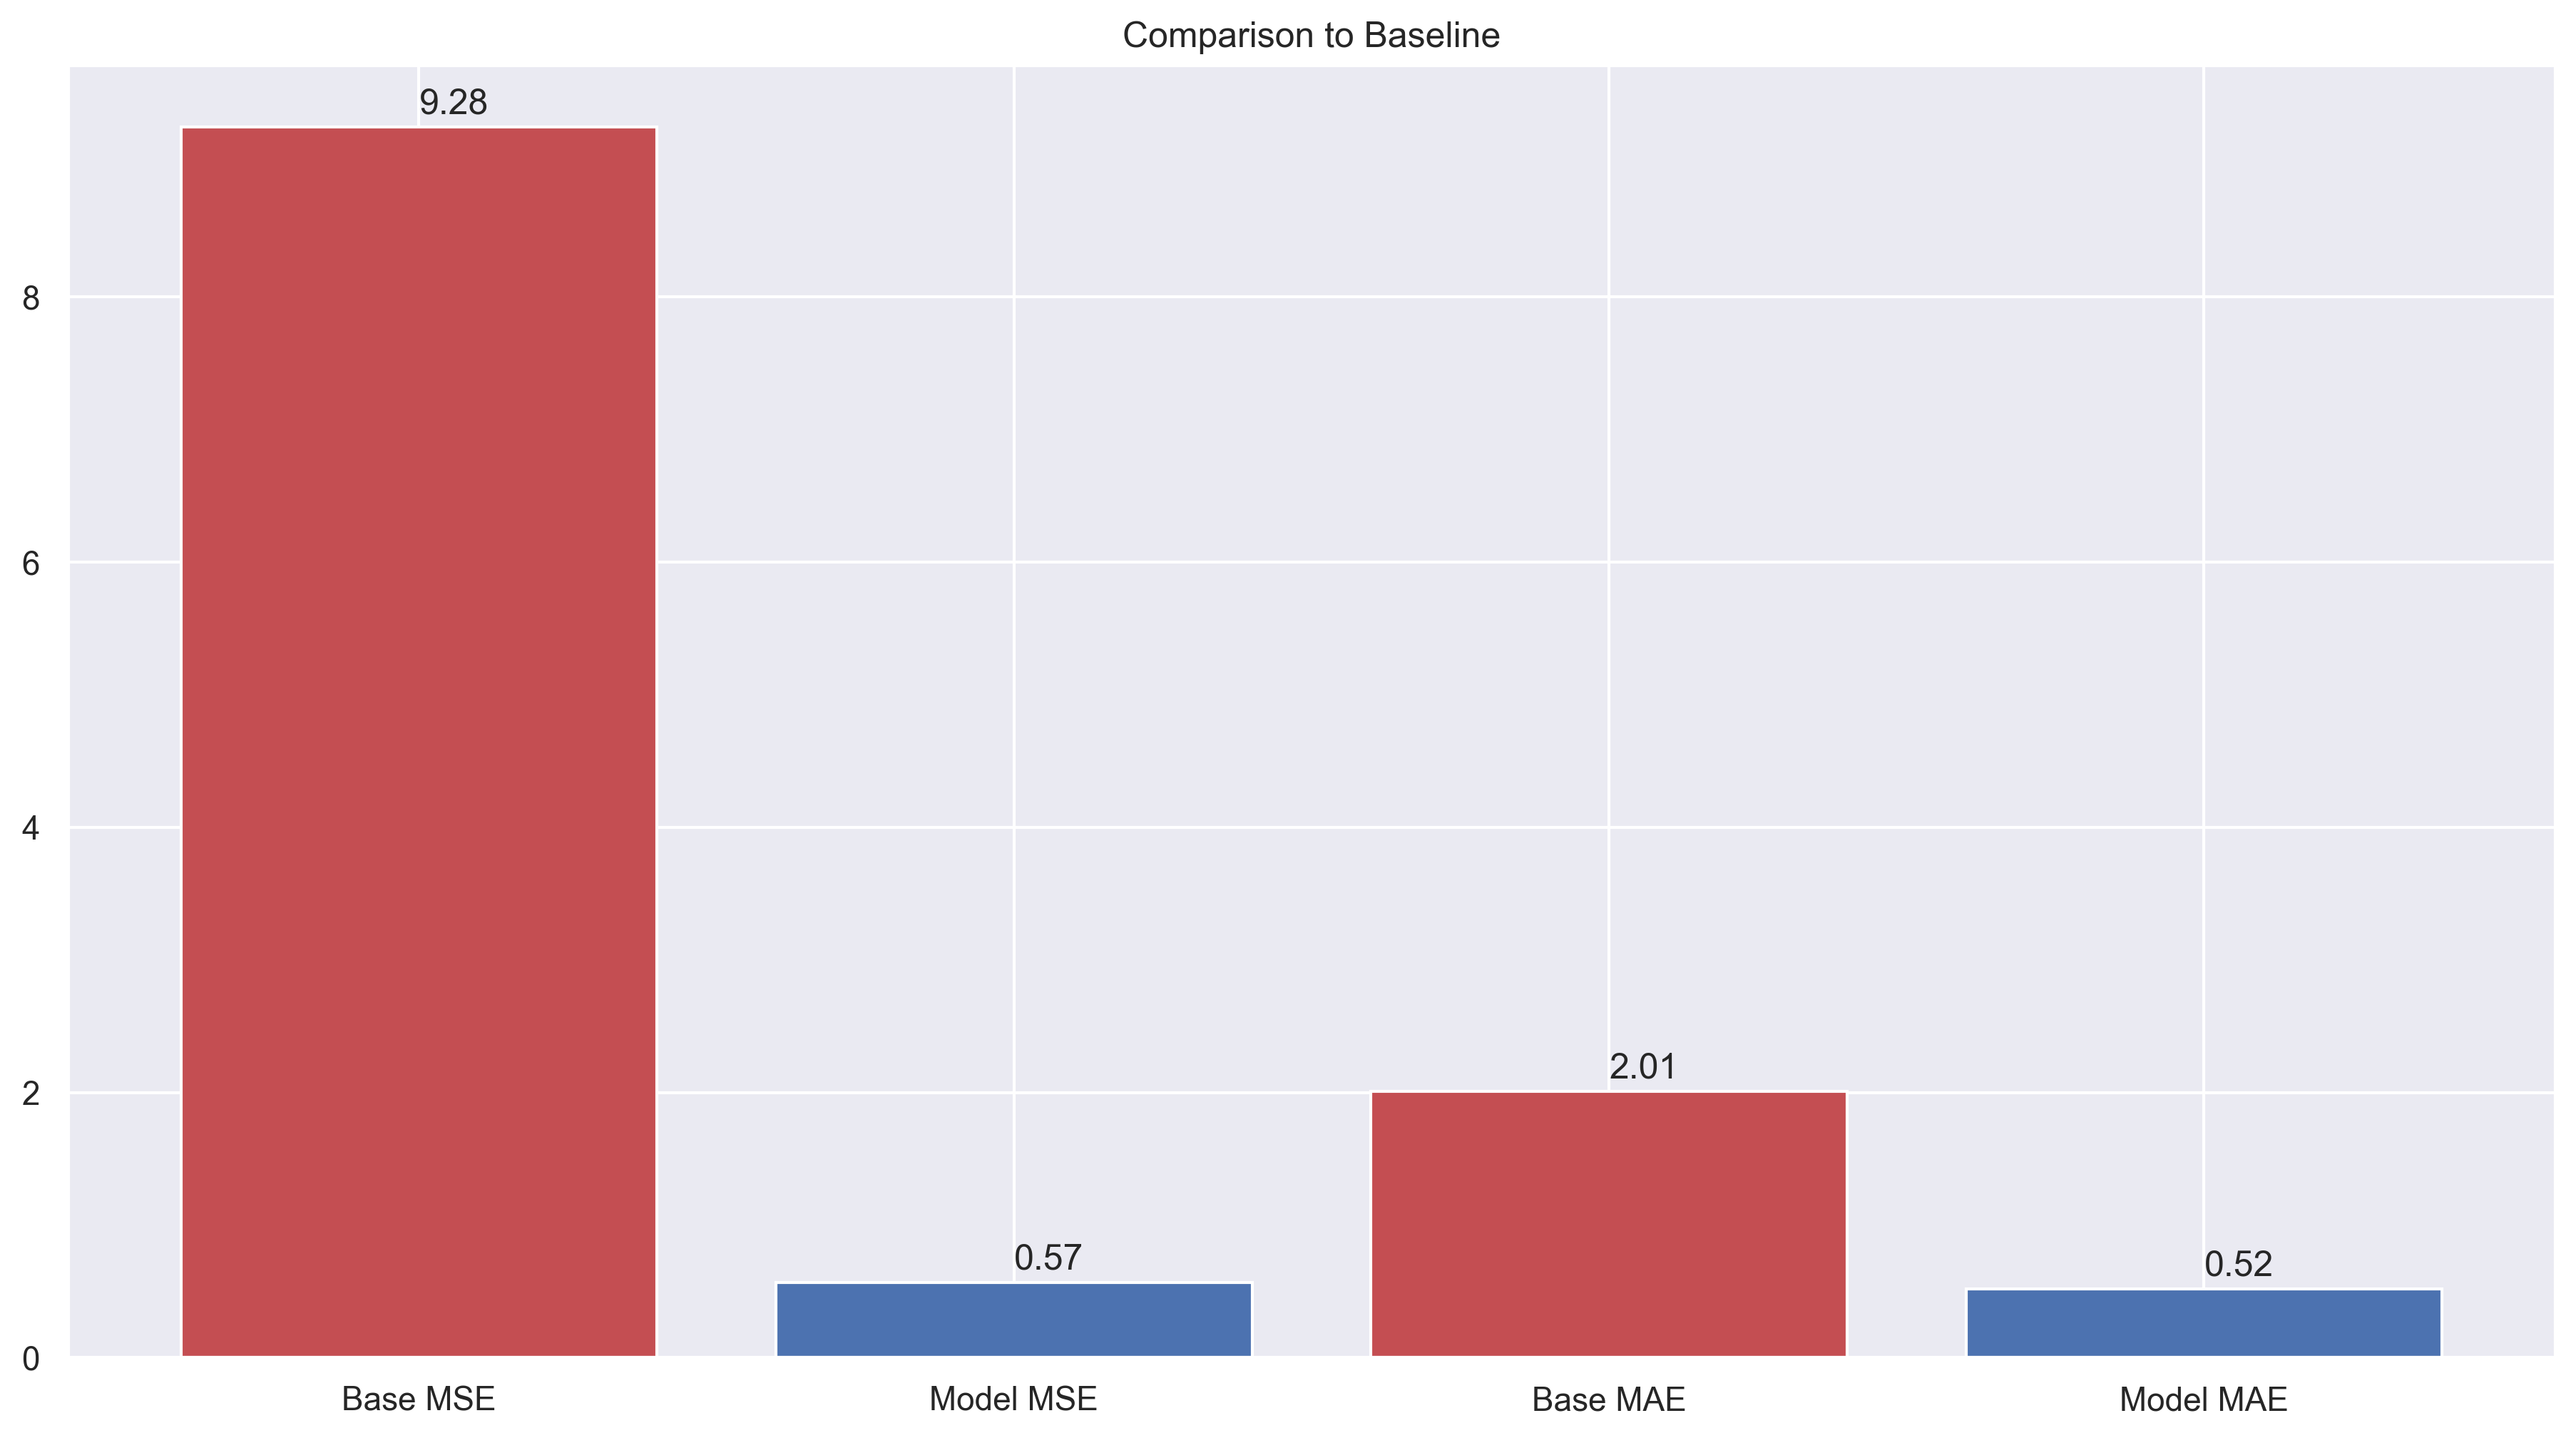

In [88]:
# visualize comparison of model vs. baseline error: 

xs = ['Base MSE', 'Model MSE', 'Base MAE', 'Model MAE']
ys = [base_mse, model_mse, base_mae, model_mae]

plt.bar(xs, ys, color=['r', 'b', 'r', 'b']);

plt.title('Comparison to Baseline')

for i in range(len(xs)):
    plt.text(xs[i], ys[i] + 0.1, '{:.2f}'.format(ys[i]))

---
### The model shows significant improvement over baseline.


#### The most critical decisions based on oil price would be made in anticipation of large changes in the oil price. Thus, it's desirable to know how model error varies relative to the rapidity of change in the spot rate. I'll check this by plotting the 'price deviation' (forward-30-days average price - spot rate) versus model prediction error.

#### Observed trending in the model error could also be used to infer missing determinants that should be accounted for or added to the model.
---

In [21]:
# construct a dataframe with actual spot price, prediction, and actual forward-30-days mean price: 

test_df = pd.DataFrame(scal.inverse_transform(X_test), columns=X.columns)[['price']]
test_df['prediction'] = predictions
test_df['actual'] = y_test.values

# measure the relevant errors:

test_df['pred_error'] = test_df['prediction'] - test_df['actual']
test_df['price_dev'] = test_df['actual'] - test_df['price']

test_df

,price,prediction,actual,pred_error,price_dev
0,72.73,71.632790,71.212333,0.420456,-1.517667
1,58.08,62.474953,63.413000,-0.938047,5.333000
2,99.40,98.376183,98.813000,-0.436817,-0.587000
3,24.79,27.231758,27.979667,-0.747909,3.189667
4,18.70,18.151871,18.701667,-0.549796,0.001667
...,...,...,...,...,...
3479,48.34,50.083183,49.547667,0.535517,1.207667
3480,44.08,49.151833,50.134333,-0.982501,6.054333
3481,48.41,50.525974,51.819667,-1.293692,3.409667
3482,51.46,49.261925,50.064333,-0.802409,-1.395667


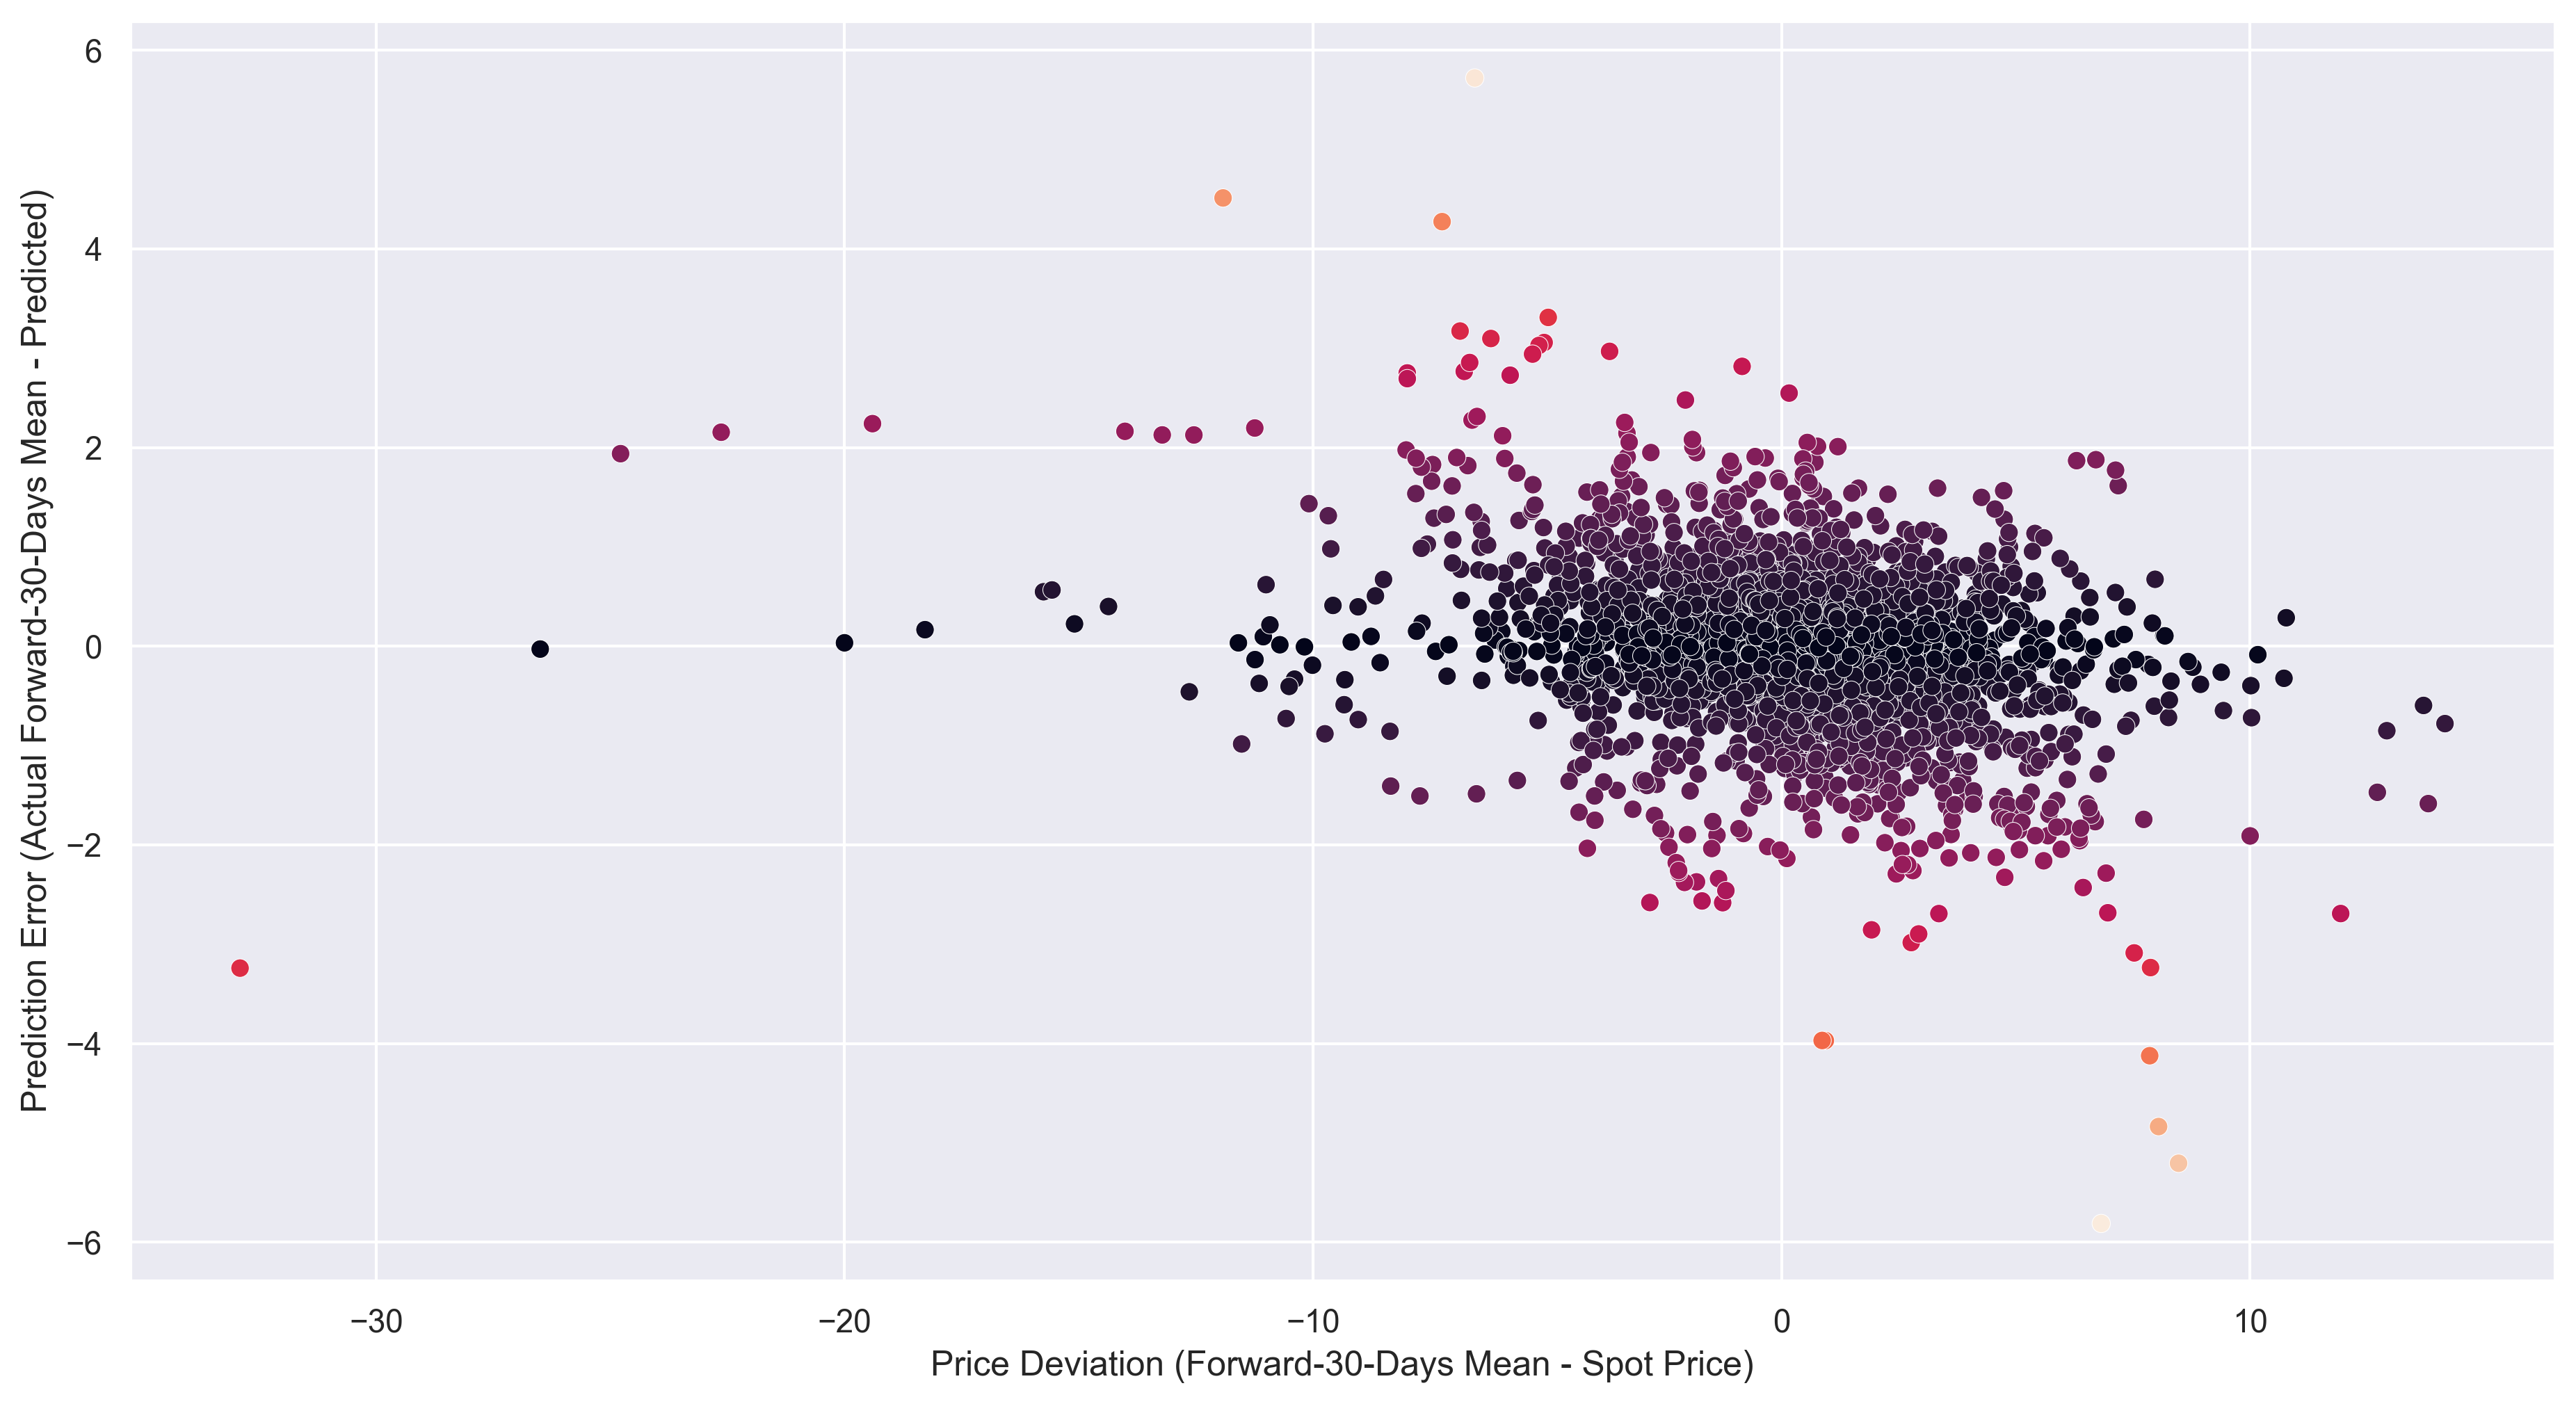

In [46]:
# view the residual trend relative to price deviation:

plt.scatter(test_df['price_dev'], test_df['pred_error'], 
            linewidth=0.25, 
            edgecolors='white',
            s=40,
            c=abs(test_df['pred_error']))

plt.xlabel('Price Deviation (Forward-30-Days Mean - Spot Price)')
plt.ylabel('Prediction Error (Actual Forward-30-Days Mean - Predicted)');

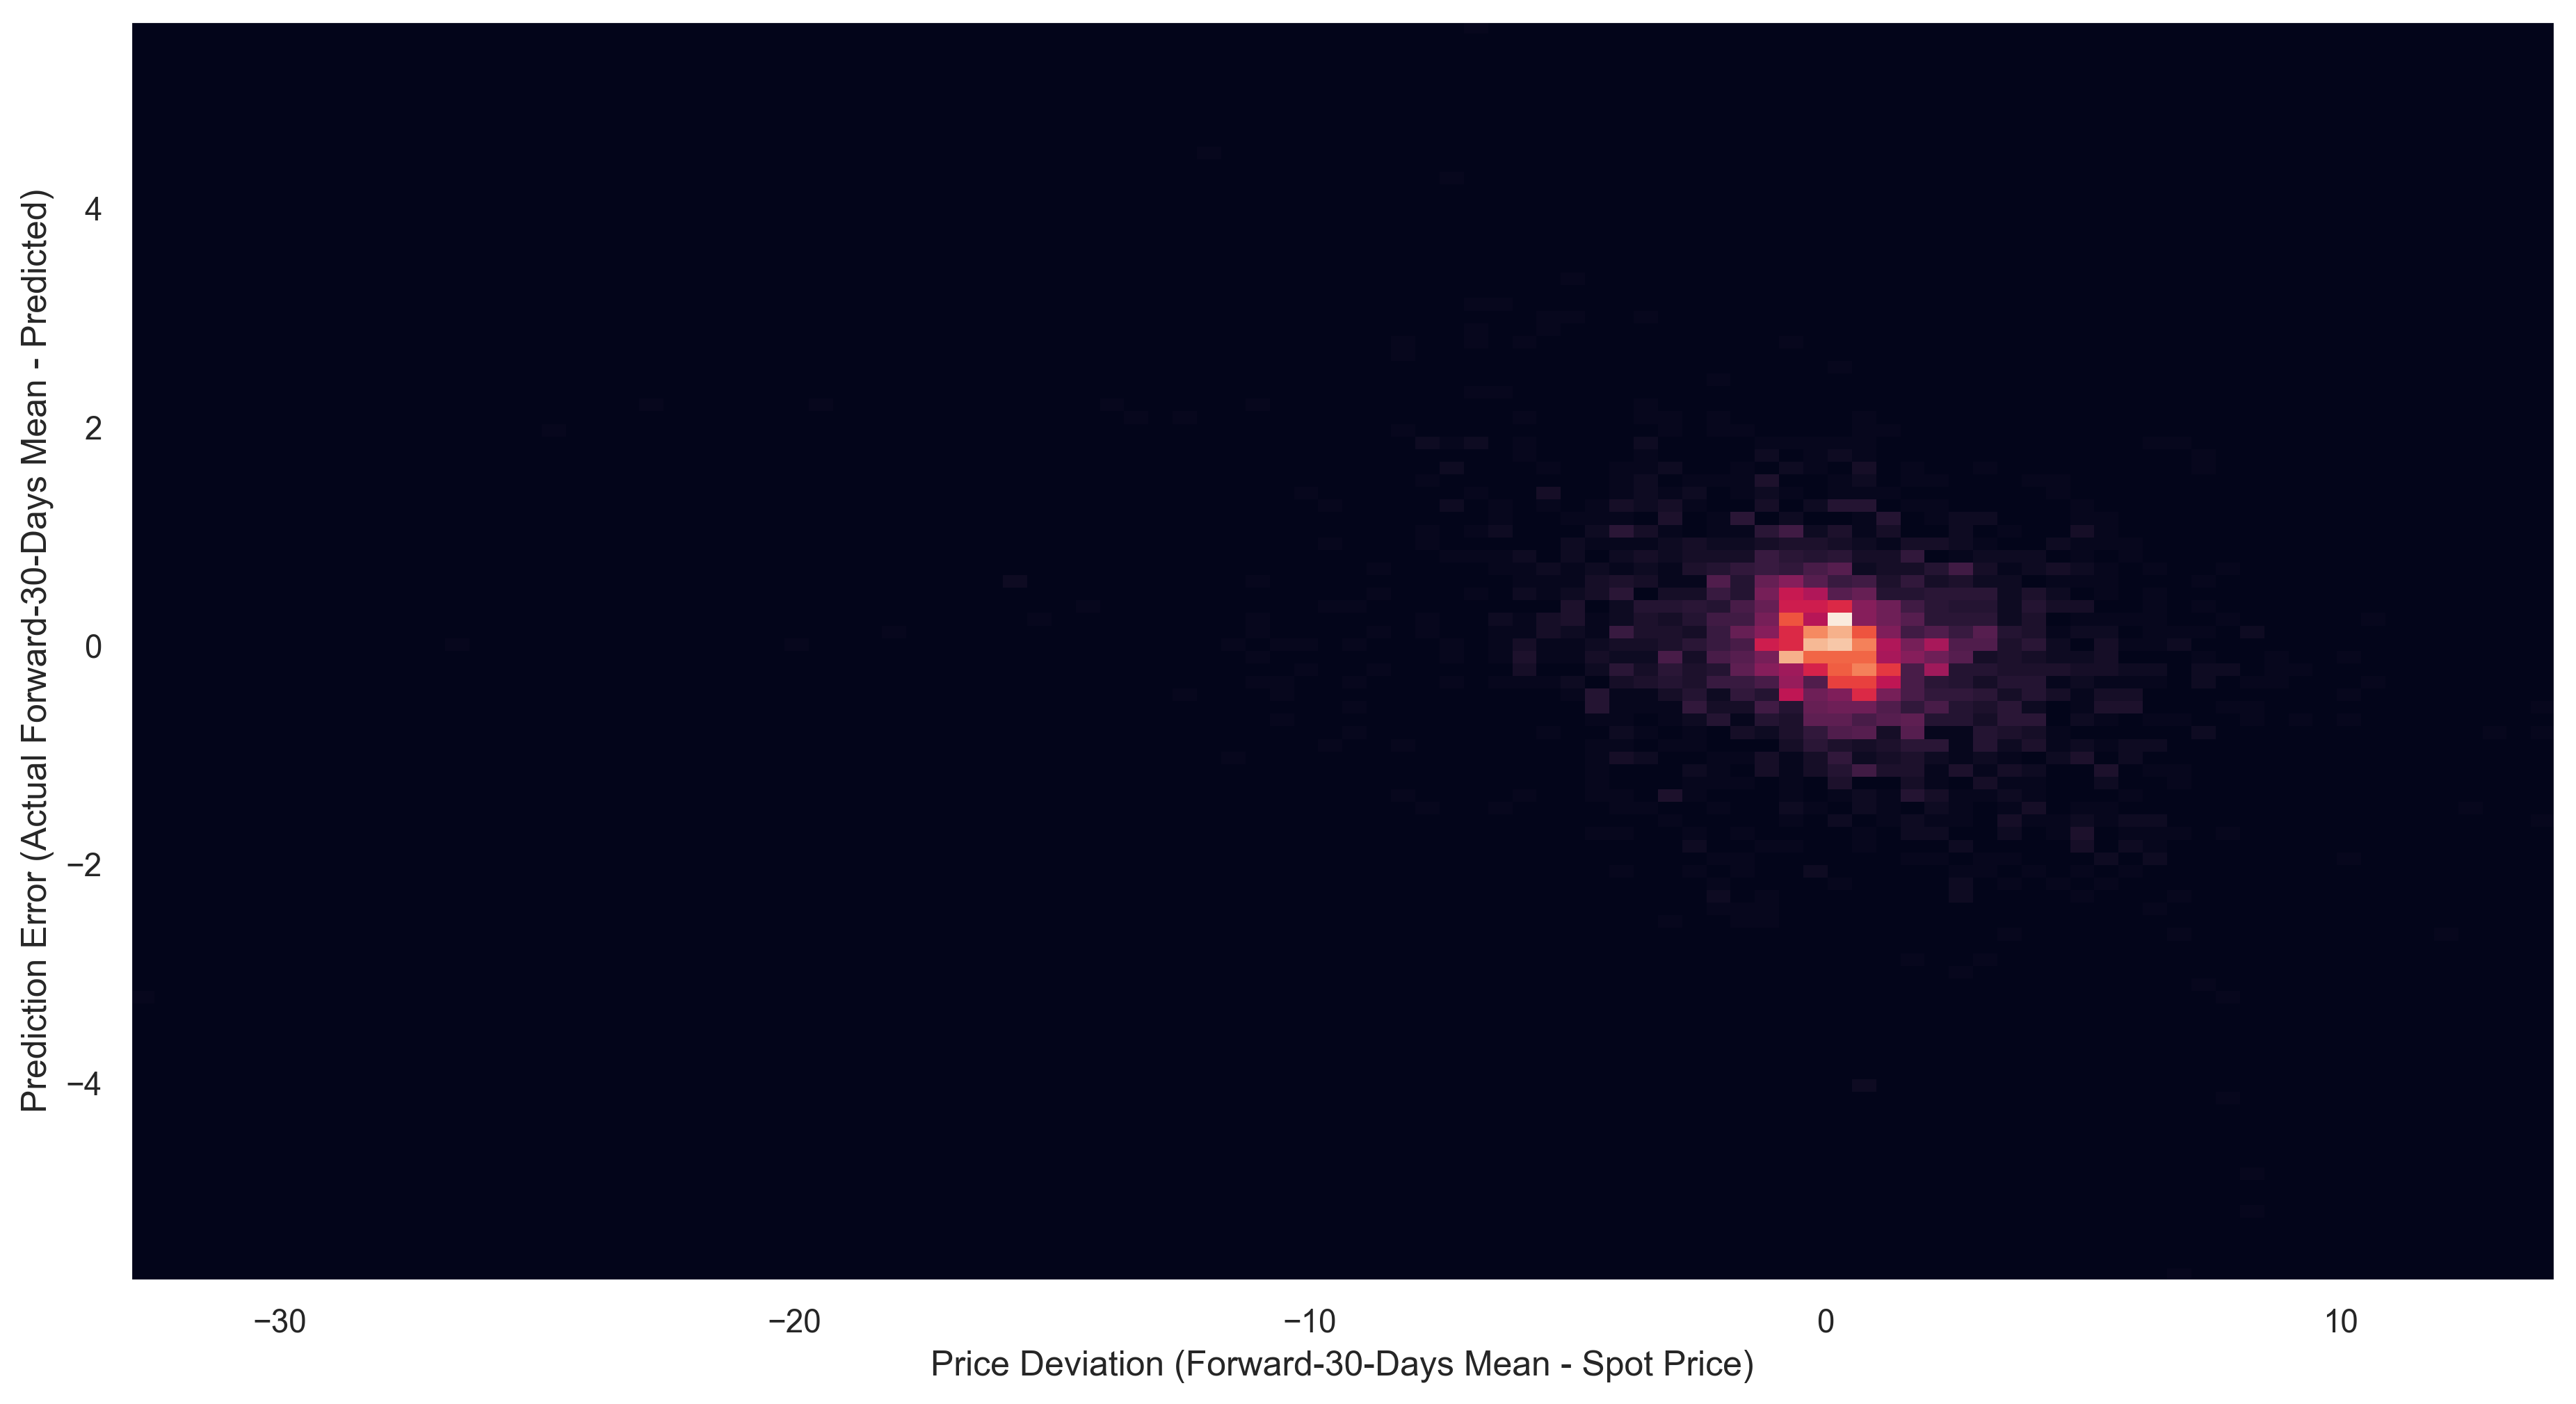

In [49]:
# alternate view (2D histogram) of residual versus price deviation:

plt.hist2d(test_df['price_dev'], test_df['pred_error'], bins=100)
plt.xlabel('Price Deviation (Forward-30-Days Mean - Spot Price)')
plt.ylabel('Prediction Error (Actual Forward-30-Days Mean - Predicted)');